## 各日数での回帰係数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install japanize-matplotlib
import japanize_matplotlib

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [2]:
df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_15392\1688623676.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')


### 30日以内か否か  
dummy_一棟を消去

In [18]:
# class_weight 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

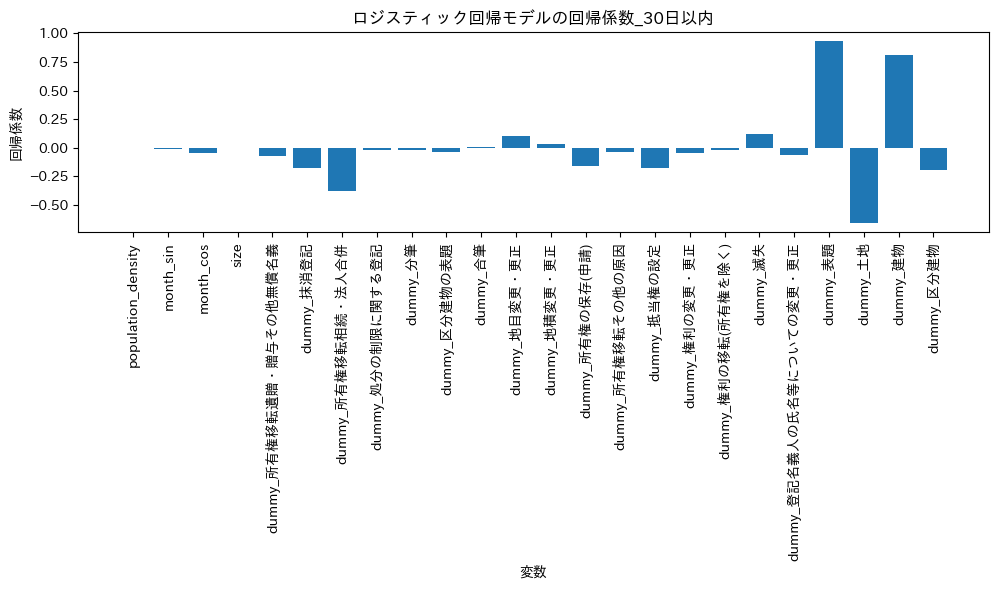

In [19]:
# class_weight 
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [20]:
# class_weight
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.826391017155824

Confusion Matrix:
[[484897  97904]
 [  8594  22041]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90    582801
           1       0.18      0.72      0.29     30635

    accuracy                           0.83    613436
   macro avg       0.58      0.78      0.60    613436
weighted avg       0.94      0.83      0.87    613436


Model Coefficients:
[[-4.67217138e-05 -1.32552667e-02 -4.42337585e-02 -2.41339646e-06
  -7.32547526e-02 -1.77368427e-01 -3.72539301e-01 -1.78446619e-02
  -2.00890487e-02 -3.76470331e-02  5.25563293e-03  9.93380730e-02
   3.72070680e-02 -1.54221022e-01 -3.24749853e-02 -1.77235475e-01
  -4.89154244e-02 -1.89175731e-02  1.24886535e-01 -6.24107277e-02
   9.29794582e-01 -6.58665647e-01  8.10677548e-01 -1.90043665e-01]]


In [5]:
# undersampling
# dummy_一棟消去
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 30, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


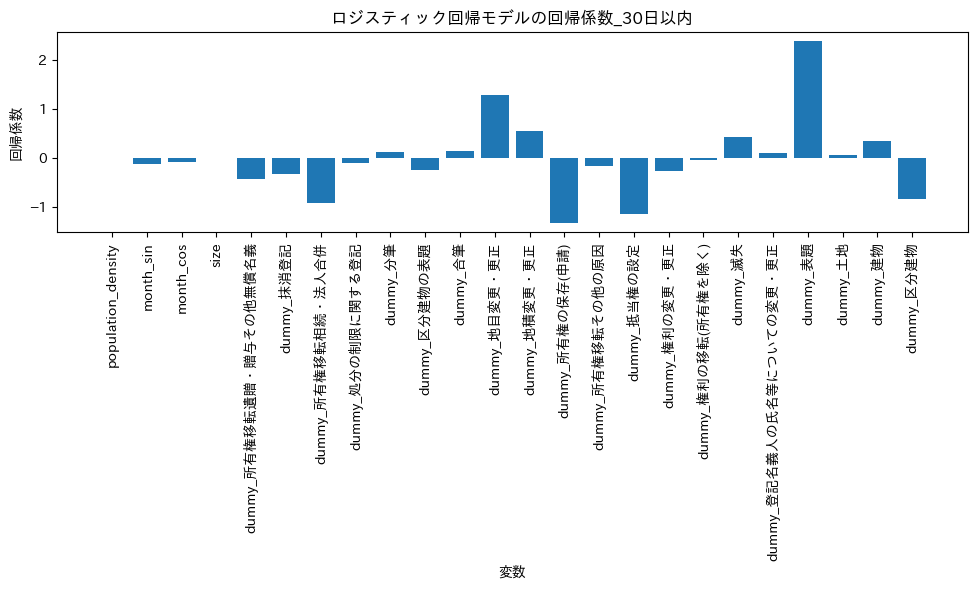

In [6]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [7]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.8221042242949084

Confusion Matrix:
[[32729  5966]
 [ 6832 26414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     38695
           1       0.82      0.79      0.80     33246

    accuracy                           0.82     71941
   macro avg       0.82      0.82      0.82     71941
weighted avg       0.82      0.82      0.82     71941


Model Coefficients:
[[ 1.00858738e-05 -1.28531690e-01 -8.74324003e-02 -6.81930798e-06
  -4.47568843e-01 -3.45612187e-01 -9.37806872e-01 -1.11372770e-01
   1.08877674e-01 -2.44291167e-01  1.27068815e-01  1.27111353e+00
   5.37489222e-01 -1.34249307e+00 -1.82194717e-01 -1.14412963e+00
  -2.83531358e-01 -5.81127794e-02  4.17858705e-01  9.79273094e-02
   2.37210596e+00  4.22287769e-02  3.38828397e-01 -8.45896722e-01]]


In [8]:
# アンダーサンプリング
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

0    199868
1    199868
Name: sales1_category, dtype: int64

### 60日以内か否か

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

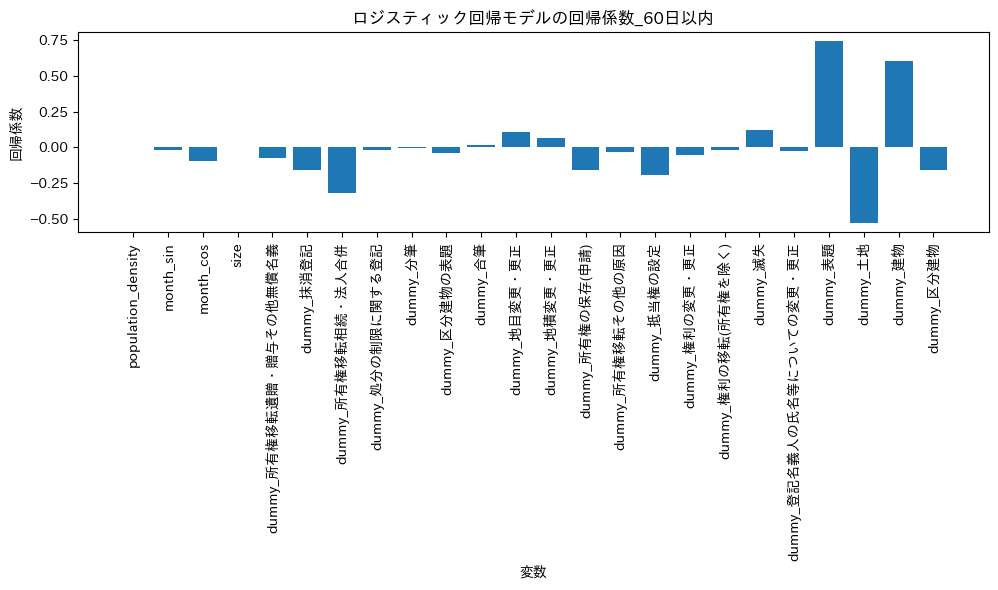

In [16]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [17]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.8173762218063498

Confusion Matrix:
[[477325  97060]
 [ 14968  24083]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89    574385
           1       0.20      0.62      0.30     39051

    accuracy                           0.82    613436
   macro avg       0.58      0.72      0.60    613436
weighted avg       0.92      0.82      0.86    613436


Model Coefficients:
[[ 3.15001532e-05 -1.86432923e-02 -9.64932919e-02 -1.73739940e-07
  -7.57219619e-02 -1.57451392e-01 -3.21614629e-01 -1.66199340e-02
  -4.23026168e-03 -4.02293500e-02  1.37071966e-02  1.10792370e-01
   6.18023450e-02 -1.59074404e-01 -3.23917032e-02 -1.91784161e-01
  -5.13528958e-02 -1.59359876e-02  1.18607472e-01 -2.70046010e-02
   7.42897387e-01 -5.32722129e-01  6.05201632e-01 -1.58840323e-01]]


In [9]:
# undersampling
# dummy_一棟消去
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 60, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

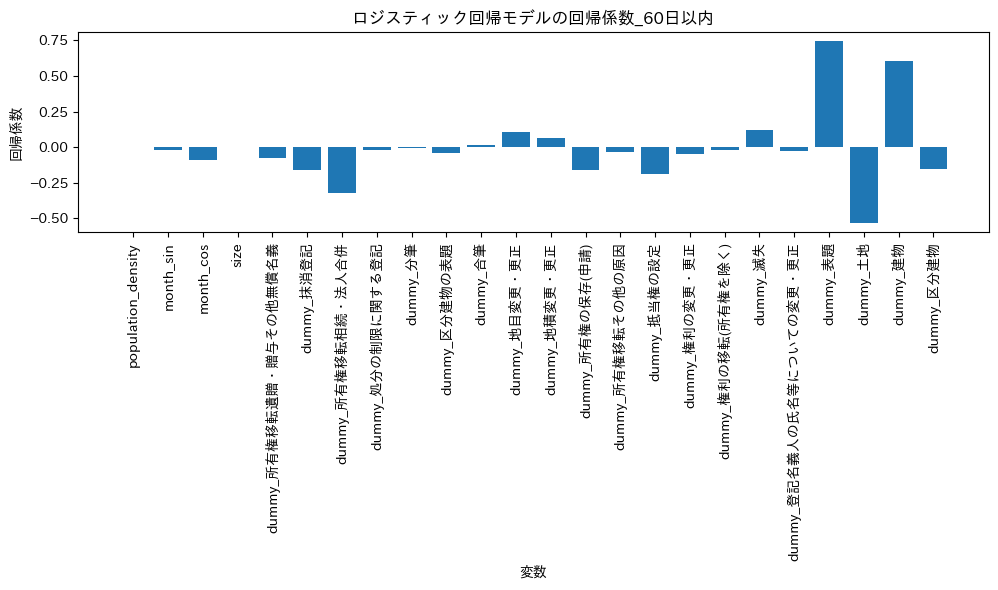

In [10]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [11]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.6939462365591398

Confusion Matrix:
[[38613 12586]
 [15877 25924]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     51199
           1       0.67      0.62      0.65     41801

    accuracy                           0.69     93000
   macro avg       0.69      0.69      0.69     93000
weighted avg       0.69      0.69      0.69     93000


Model Coefficients:
[[ 2.96493459e-05 -1.94473449e-02 -9.17221496e-02 -6.20737993e-08
  -7.48690136e-02 -1.59110212e-01 -3.18494636e-01 -1.68369761e-02
  -3.24651932e-03 -3.92466608e-02  1.44582049e-02  1.08724677e-01
   6.11777798e-02 -1.60852694e-01 -3.26551176e-02 -1.89810546e-01
  -5.10641081e-02 -1.64821065e-02  1.19937366e-01 -2.62826981e-02
   7.42325871e-01 -5.34203208e-01  6.06366633e-01 -1.55821077e-01]]


### 90日以内か否か

In [21]:
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

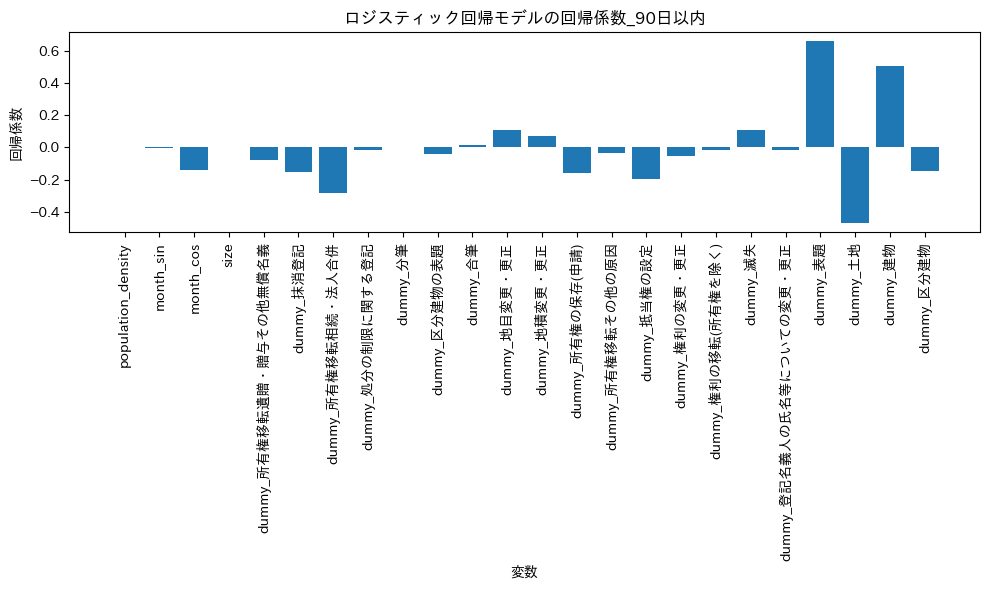

In [22]:
# class_weight
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [23]:
# class_weight
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.8040414974015219

Confusion Matrix:
[[468193 101843]
 [ 18365  25035]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89    570036
           1       0.20      0.58      0.29     43400

    accuracy                           0.80    613436
   macro avg       0.58      0.70      0.59    613436
weighted avg       0.91      0.80      0.84    613436


Model Coefficients:
[[ 6.15437486e-05 -1.31735044e-03 -1.41403933e-01 -1.20777629e-07
  -7.66349017e-02 -1.50046686e-01 -2.86620893e-01 -1.42332138e-02
   3.50546743e-03 -4.12027962e-02  1.66969779e-02  1.09297678e-01
   6.79502834e-02 -1.60940295e-01 -3.17575232e-02 -1.98581140e-01
  -5.25395918e-02 -1.43390580e-02  1.09907031e-01 -1.32407866e-02
   6.59582933e-01 -4.71895875e-01  5.05575886e-01 -1.43815297e-01]]


In [24]:
# アンダーサンプリング
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

0    270373
1    270373
Name: sales1_category, dtype: int64

### 180日以内か否か

In [25]:
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

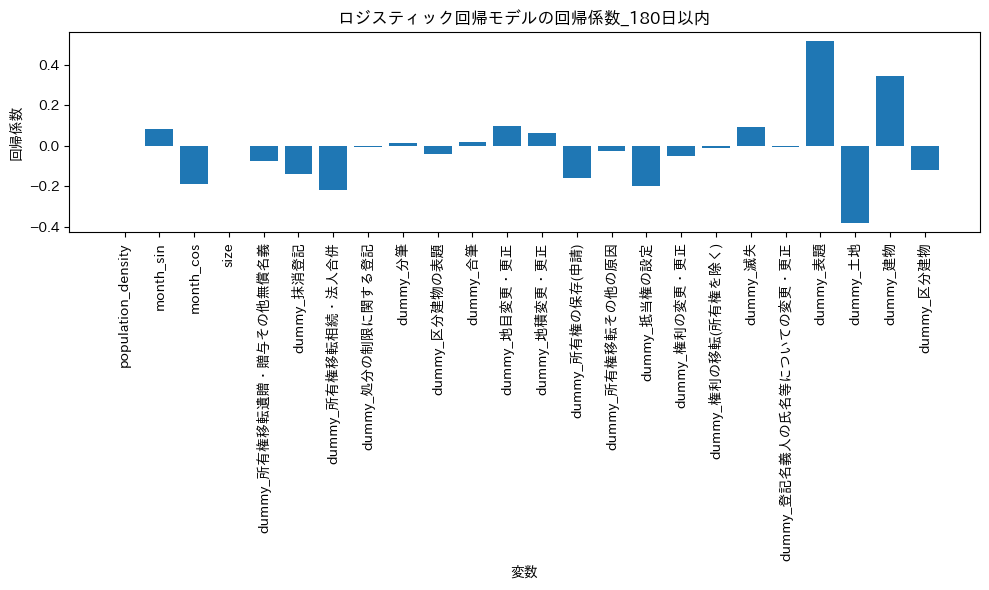

In [26]:
# class_weight
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [27]:
# class_weight
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.782329370953123

Confusion Matrix:
[[451986 111301]
 [ 22226  27923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87    563287
           1       0.20      0.56      0.29     50149

    accuracy                           0.78    613436
   macro avg       0.58      0.68      0.58    613436
weighted avg       0.89      0.78      0.82    613436


Model Coefficients:
[[ 1.05974522e-04  8.24612602e-02 -1.91649011e-01 -2.80234760e-08
  -7.34073942e-02 -1.41424743e-01 -2.16718519e-01 -7.49074491e-03
   1.32618576e-02 -3.90539583e-02  2.04247775e-02  9.54466276e-02
   6.51623153e-02 -1.58283852e-01 -2.78389685e-02 -1.98461868e-01
  -5.14258737e-02 -1.09014044e-02  9.08166366e-02 -5.93255082e-03
   5.17038108e-01 -3.84045668e-01  3.44916388e-01 -1.19132416e-01]]


In [28]:
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

0    375570
1    375570
Name: sales1_category, dtype: int64

### 360日以内か否か

In [28]:
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

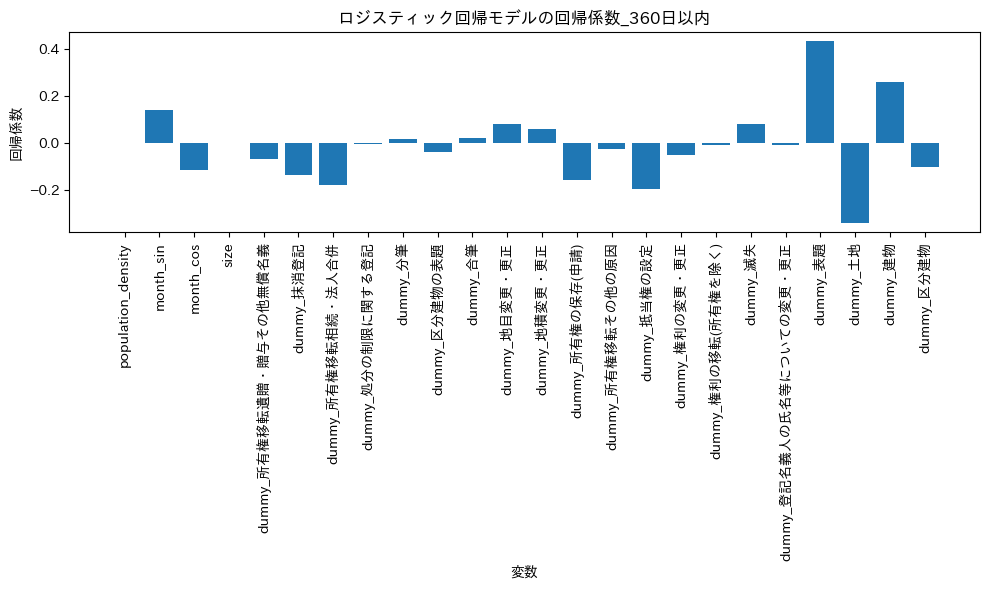

In [29]:
# class_weight
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [30]:
# class_weight
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7723609308876558

Confusion Matrix:
[[444212 114869]
 [ 24773  29582]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86    559081
           1       0.20      0.54      0.30     54355

    accuracy                           0.77    613436
   macro avg       0.58      0.67      0.58    613436
weighted avg       0.88      0.77      0.81    613436


Model Coefficients:
[[ 1.23942254e-04  1.39029413e-01 -1.14668138e-01  1.05979779e-07
  -6.85363522e-02 -1.36169377e-01 -1.78709305e-01 -2.09604563e-03
   1.86926069e-02 -3.52387095e-02  2.18764831e-02  8.27936430e-02
   5.97327674e-02 -1.55203458e-01 -2.35133146e-02 -1.92026163e-01
  -4.83211875e-02 -9.25143270e-03  8.08611797e-02 -6.22076598e-03
   4.31102923e-01 -3.38813518e-01  2.57643328e-01 -1.02573523e-01]]


### 360日以上か否か

In [31]:
df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all['sales1_period'] > 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

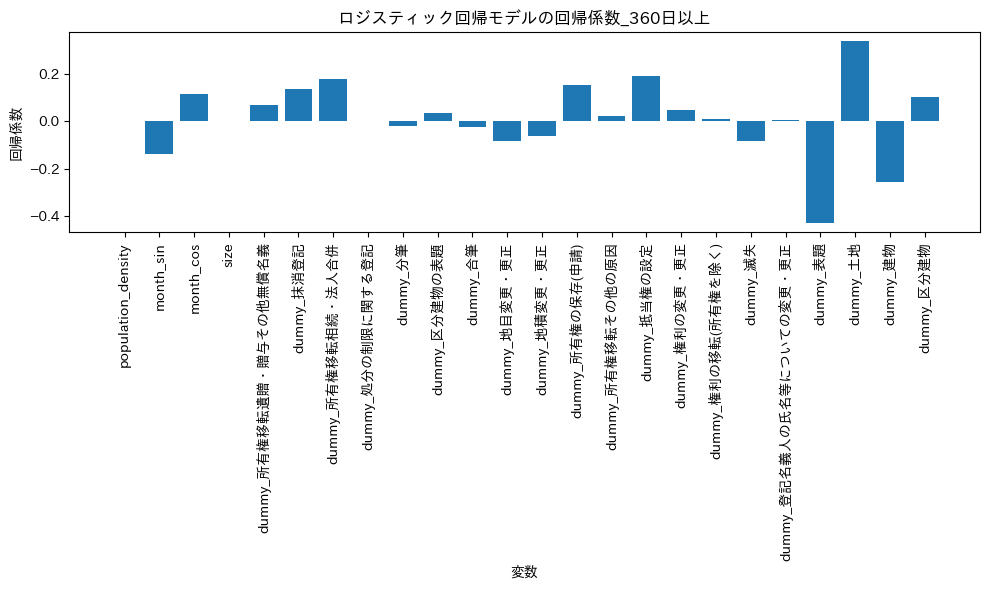

In [32]:
# class_weight
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('ロジスティック回帰モデルの回帰係数_360日以上')
plt.tight_layout()  # レイアウト調整
plt.show()

In [33]:
# class_weight
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7723609308876558

Confusion Matrix:
[[ 29582  24773]
 [114869 444212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.54      0.30     54355
           1       0.95      0.79      0.86    559081

    accuracy                           0.77    613436
   macro avg       0.58      0.67      0.58    613436
weighted avg       0.88      0.77      0.81    613436


Model Coefficients:
[[-1.23942254e-04 -1.39029413e-01  1.14668138e-01 -1.05979779e-07
   6.85363522e-02  1.36169377e-01  1.78709305e-01  2.09604563e-03
  -1.86926069e-02  3.52387095e-02 -2.18764831e-02 -8.27936430e-02
  -5.97327674e-02  1.55203458e-01  2.35133146e-02  1.92026163e-01
   4.83211875e-02  9.25143270e-03 -8.08611797e-02  6.22076598e-03
  -4.31102923e-01  3.38813518e-01 -2.57643328e-01  1.02573523e-01]]
